Credits/Course URL: https://www.udemy.com/course/machinelearning/

## K-Means Clustering

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#### Reading the data

In [3]:
data = pd.read_csv(r'E:\Github\Datasets\Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


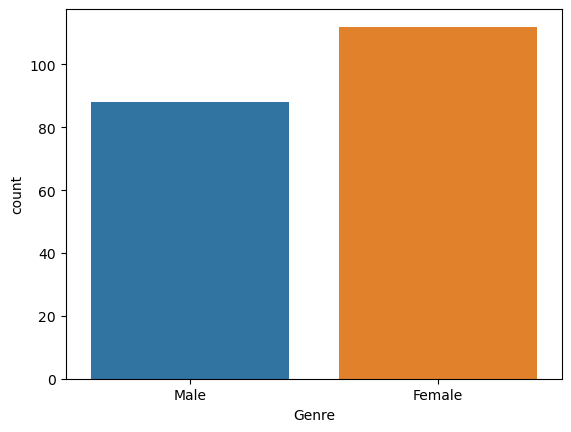

In [6]:
sns.countplot(x='Genre', data = data);

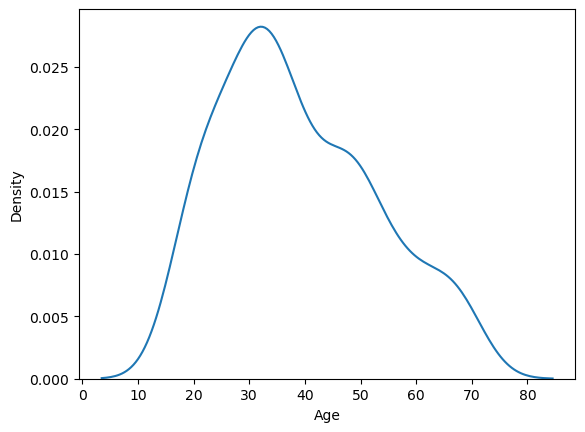

In [7]:
sns.kdeplot(x = 'Age', data = data);

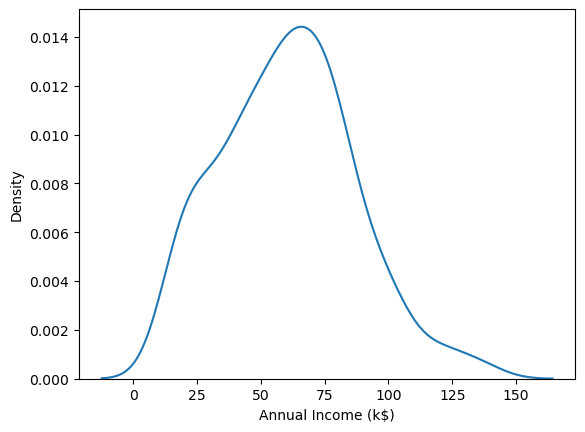

In [8]:
sns.kdeplot(x = 'Annual Income (k$)', data = data);

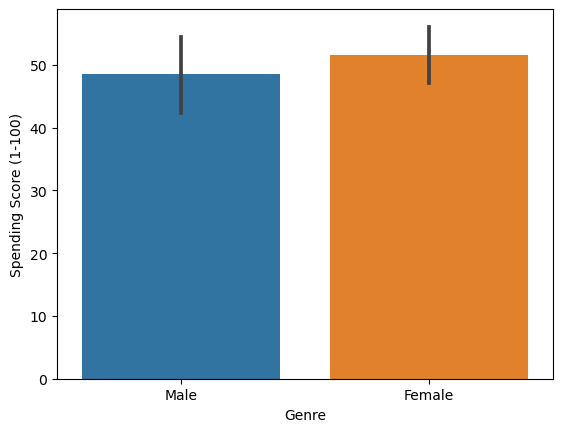

In [9]:
sns.barplot(x = 'Genre', y = 'Spending Score (1-100)', data = data);

In [10]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
data.groupby('Genre').agg(['mean', 'median'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].round(2)

Age        Annual Income (k$)        Spending Score (1-100)       
         mean median               mean median                   mean median
Genre                                                                       
Female  38.10   35.0              59.25   60.0                  51.53   50.0
Male    39.81   37.0              62.23   62.5                  48.51   50.0

In [13]:
data_processed = data.copy(deep=True)

In [14]:
data_processed.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [15]:
data_processed = data_processed.drop(['CustomerID', 'Genre'], axis = 1)

In [16]:
data_processed.head(3)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6


In [17]:
data_processed.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [18]:
data_processed = data_processed.rename(columns={'Annual Income (k$)': 'Annual_Income', 
                                                'Spending Score (1-100)':'Spending_Score' })

In [19]:
data_processed.head(3)

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6


#### Getting relevant features of the dataset

In [20]:
X = data_processed.iloc[:, [1,2]].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

#### Getting optimal number of clusters for K-Means

In [35]:
wcss = []
k_values = range(1,11)

for i in k_values:
    knn = KMeans(n_clusters=i, init='k-means++', random_state=42)
    knn.fit(X)
    wcss.append(round(knn.inertia_,2))

In [37]:
k_value_df = pd.DataFrame({'k-values': k_values, 'wcss': wcss}).T
k_value_df

,0,1,2,3,4,5,6,7,8,9
k-values,1.00,2.0,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00
wcss,269981.28,181363.6,106348.37,73679.79,44448.46,37233.81,30259.66,25011.84,21850.17,19672.07


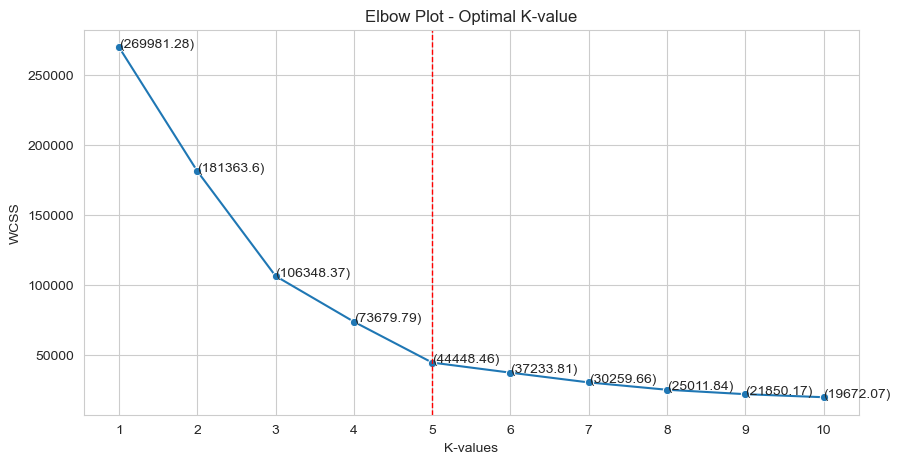

In [41]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")

lp = sns.lineplot(x = k_values, y = wcss, marker='o')
lp.axvline(5, linewidth = 1, linestyle ="--",
             color ='red')

for k,wcss_value in zip(k_values, wcss):
    lp.annotate(f'({wcss_value})', xy=(k,wcss_value))
    
plt.xticks(k_values)
plt.title("Elbow Plot - Optimal K-value")
plt.ylabel("WCSS")
plt.xlabel("K-values")
plt.show()

#### Fitting the K-Means with optimal number of clusters

In [69]:
knn = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = knn.fit_predict(X)

In [70]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [83]:
cluster_centers = np.round(knn.cluster_centers_,2)
cluster_centers

array([[55.3 , 49.52],
       [88.2 , 17.11],
       [26.3 , 20.91],
       [25.73, 79.36],
       [86.54, 82.13]])

In [72]:
data_processed.head(3)

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6


In [74]:
data_processed['Cluster'] = y_kmeans
data_processed.head()

,Age,Annual_Income,Spending_Score,Cluster
0,19,15,39,2
1,21,15,81,3
2,20,16,6,2
3,23,16,77,3
4,31,17,40,2


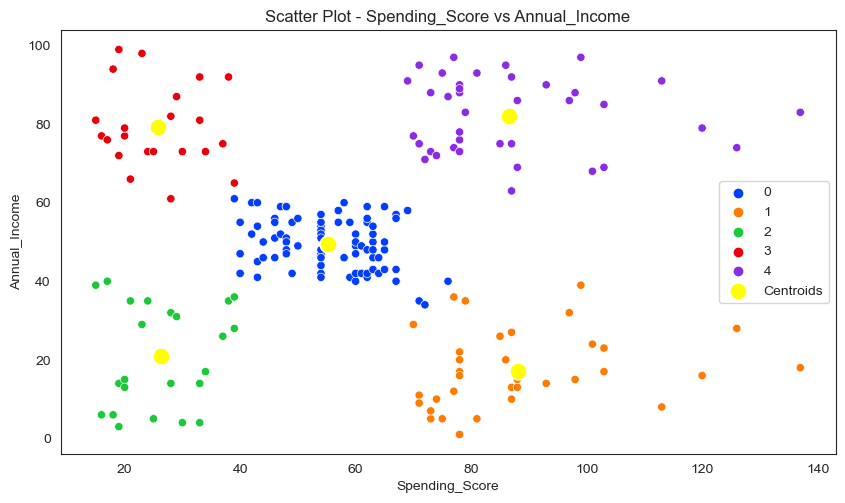

In [105]:
plt.figure(figsize=(10,5.5))
sns.set_style("white")

sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score', data = data_processed, hue = 'Cluster', palette="bright")
sns.scatterplot(x = cluster_centers[:, 0], y = cluster_centers[:,1], color = 'yellow', s = 150, label = 'Centroids')
plt.title("Scatter Plot - Spending_Score vs Annual_Income")
plt.ylabel("Annual_Income")
plt.xlabel("Spending_Score")
plt.show()